### Урок 1. Основы обучения нейронных сетей
Попробуйте видоизменить параметры разобранной на уроке нейронной сети таким образом, чтобы улучшить её точность. Проведите анализ:
- Что приводит к ухудшению точности нейронной сети?
- Что приводит к увеличению её точности?

In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt

In [2]:
# первоначальное точка
start_point = 5

# размер шага (learning rate)
learning_rate = 0.1

# установка минимального значения, на которое должны изменяться веса
eps = 0.0001

func = lambda x: 2 * x ** 2
# функция градиента для y = 2 * X**2
gr_func = lambda x: 4 * x

# для картинки
D = 5

X = np.linspace(-D, +D, 20)
Y = func(X)

# начальная точка
next_point = start_point

n_iter = 0

x = []
x.append(next_point)

Итерация: 1
Текущая точка 5| Следующаяя точка 3.0
--------------------------------------------------------
Итерация: 2
Текущая точка 3.0| Следующаяя точка 1.7999999999999998
--------------------------------------------------------
Итерация: 3
Текущая точка 1.7999999999999998| Следующаяя точка 1.0799999999999998
--------------------------------------------------------
Итерация: 4
Текущая точка 1.0799999999999998| Следующаяя точка 0.6479999999999999
--------------------------------------------------------
Итерация: 5
Текущая точка 0.6479999999999999| Следующаяя точка 0.3887999999999999
--------------------------------------------------------
Итерация: 6
Текущая точка 0.3887999999999999| Следующаяя точка 0.23327999999999993
--------------------------------------------------------
Итерация: 7
Текущая точка 0.23327999999999993| Следующаяя точка 0.13996799999999995
--------------------------------------------------------
Итерация: 8
Текущая точка 0.13996799999999995| Следующаяя точка 0.08398

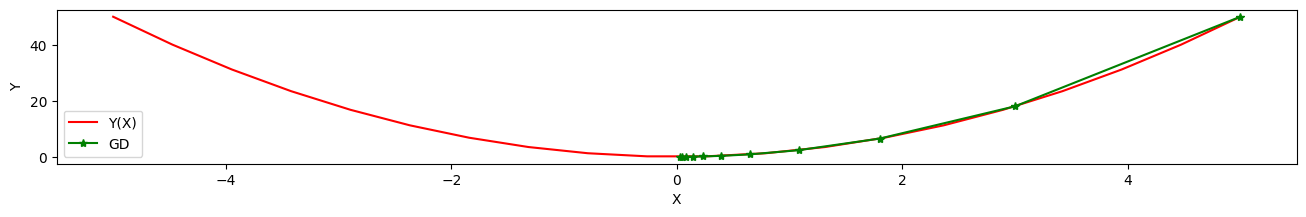

In [35]:
plt.figure(figsize=(16, 2))
plt.plot(X, Y, 'r', label='Y(X)')

# количество итерация 
n = 10
for i in range(n):
    current_point = next_point

    # движение в негативную сторону вычисляемого градиента
    next_point = current_point - learning_rate * gr_func(current_point)
    x.append(next_point)
    # print(next_point)                                     

    n_iter += 1

    # остановка когда достигнута необходимая степень точности
    print(f"Итерация: {n_iter}")
    print(f"Текущая точка {current_point}| Следующаяя точка {next_point}")
    print("--------------------------------------------------------")
    
    
    if (abs(current_point - next_point) <= eps):
        break

print(f"минимум {next_point}, количество затраченных итераций: {n_iter}") 
X_grad = np.array(x)
plt.plot(X_grad, func(X_grad), '-*g', label = 'GD')
plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

- Верно подобранная точка старта позволяет сократить кол-во итераций для достижения верного результата. 
- верно подобранный шаг позволяет сократить  кол-во итераций, но влияет на точность результата, есть возможность проскачить нужную обрасть.<b>
### в общем в зависимости от задачи корректируются те или иные параметры в комплексе.  



In [3]:
# вычисление сигмоид функции
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# вычисление производной от сигмоид функции
def sigmoid_deriv(x):
    return sigmoid(x) * (1 - sigmoid(x))

In [4]:
X = np.array([[1]])
y = np.array([[1]]).T

# генерации случайных чисел для инициализации весов
np.random.seed(1)
weights = np.random.random((X.shape[1], 1))
bias = np.random.random((1, 1))

display(weights, bias)

array([[0.417022]])

array([[0.72032449]])

In [5]:
# сделаем предсказание
output = X * weights + bias
pred = sigmoid(output)
pred

array([[0.75719212]])

In [6]:
# ошибка
(y - pred) ** 2

array([[0.05895567]])

In [7]:
dsigm = 2 * (pred - y)
db = dsigm * sigmoid_deriv(output)
da = 1 * db
dw0 = 1 * db
dw1 = da * X

bias = bias - dw0
weights = weights - dw1
weights, bias

(array([[0.50630354]]), array([[0.80960603]]))

In [8]:
 # Новое предсказание
sigmoid(np.dot(X, weights) + bias)

array([[0.78850036]])

In [9]:
output = np.dot(X, weights) + bias
pred = sigmoid(output)

dsigm = 2 * (pred - y)
db = dsigm * sigmoid_deriv(output)
da = 1 * db
dw0 = 1 * db
dw1 = da * X
bias -= dw0
weights -= dw1
sigmoid(np.dot(X, weights) + bias)

array([[0.81107259]])

In [10]:
weights, bias

(array([[0.57684609]]), array([[0.88014858]]))

### С данной моделлькой достаточно было провести 5-10 подборов (weights, bias) для обучения нейрона и выдачи верного результата. 

In [11]:
# создание данных для обучения
X = np.array([[0], [1]])
y = np.array([[0, 1]]).T

# генерации случайных чисел для инициализации весов
np.random.seed(1)
weights = np.random.random((X.shape[1], 1))
bias = np.random.random((1, 1))

display(weights, bias)

array([[0.417022]])

array([[0.72032449]])

In [12]:
# сделаем предсказание
output = np.dot(X, weights) + bias
pred = sigmoid(output)
pred

array([[0.67267847],
       [0.75719212]])

In [13]:
dsigm = 2 * (pred - y)
print(dsigm)
db = dsigm * sigmoid_deriv(output)
print(db)
da = 1 * db
print(da)
# Для получения единичного значения градиента  w0  матрично умножим b на единичкую матрицу 
dw0 = np.ones((X.shape[0])) @ db
print(dw0)
# Для получения единичного значения градиента  w1  матрично умножим (da * X) на единичкую матрицу 
dw1 = np.ones((X.shape[0])) @ (da * X)
#  или dw1 = da.T @ X
print(dw1)

[[ 1.34535694]
 [-0.48561576]]
[[ 0.29622358]
 [-0.08928153]]
[[ 0.29622358]
 [-0.08928153]]
[0.20694205]
[-0.08928153]


In [14]:
# обновим параметры
bias -= dw0
weights -= dw1

# сделаем предсказания
sigmoid(np.dot(X, weights) + bias)

array([[0.62559906],
       [0.73491143]])

In [15]:
# тренировка нейронной сети
def train_nn(X, y, num_iters):
    global weights, bias
    for n_iter in range(num_iters):
        # проход данных через нейрон
        output = run_nn(X)

        # вычисление ошибки через обратное распространение back-propagation
        error = output - y
            
        # выполнение корректировки весов
        grad = np.dot(X.T, error * sigmoid_deriv(output))
        grad_bias = np.sum(error * sigmoid_deriv(output), keepdims=1)
        weights -= grad
        bias -= grad_bias


# пропускание входных данных через нейрон и получение предсказания
# конвертация значений во floats
def run_nn(inputs):
    global weights, bias
    inputs = inputs.astype(float)
    output = sigmoid(np.dot(inputs, weights) + bias)
    return output

In [16]:
# генерации случайных чисел для инициализации весов
np.random.seed(1)
weights = np.random.random((X.shape[1], 1))
bias = np.random.random((1, 1))
print("веса до обучения: ")
print(weights, bias)

# запуск тренировки нейронной сети 
train_nn(X, y, 10000)
print("веса после завершения обучения: ")
print(weights, bias)

веса до обучения: 
[[0.417022]] [[0.72032449]]
веса после завершения обучения: 
[[13.60579935]] [[-6.71988778]]


In [18]:
user_inp1, user_inp2 = 0, 1
print(f"Проверка на новых данных: {user_inp1} {user_inp2}")
print("Предсказание нейронной сети: ")
print(run_nn(np.array([[user_inp1], [user_inp2]])))

Проверка на новых данных: 0 1
Предсказание нейронной сети: 
[[0.00120522]
 [0.99897896]]


### Подбор данных и выбор необходимой функции  определяют успех обучения(верного) и соответственно предсказания нейросети.


In [19]:
import numpy as np
import matplotlib.pyplot as plt


# вычисление сигмоид функции
def sigmoid(x):
    x = np.clip(x, a_min=-500, a_max=500)
    return 1 / (1 + np.exp(-x))

# вычисление производной от сигмоид функции
def sigmoid_deriv(x):
    return sigmoid(x) * (1 - sigmoid(x))

(1797, 64)


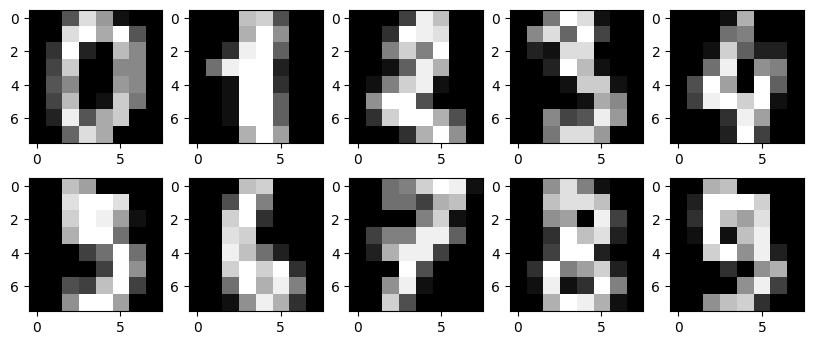

In [20]:

from sklearn.datasets import load_digits
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt


# Подготовка тренировочных данных
X, y = load_digits(return_X_y=True)
print(X.shape) # расскоментируйте, чтобы размер данных

# репрезентация данных
plt.figure(figsize=(10, 4))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X[i,:].reshape([8, 8]), cmap='gray')

In [21]:
def to_one_hot(Y):
    n_col = np.max(Y) + 1
    binarized = np.zeros((len(Y), n_col))
    for i in range(len(Y)):
        binarized[i, Y[i]] = 1
    return binarized

In [22]:
# формирование входных данных
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# формирование выходных данных(результатов)
y = y.flatten()
y = to_one_hot(y)
display(y, y.shape)

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 1., 0.]])

(1797, 10)

In [23]:
from sklearn.model_selection import train_test_split

# Разделение данных на тренировочные и тестовые
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
X_train.shape, X_test.shape

((1203, 64), (594, 64))

In [24]:
# тренировка нейронной сети
def train_nn(X, y, num_iters):
    global weights
    for n_iter in range(num_iters):
        # проход данных через нейрон
        output = run_nn(X)

        # вычисление ошибки через обратное распространение back-propagation
        error = output - y
        
        # выполнение корректировки весов
        grad = np.dot(X.T, error * sigmoid_deriv(output))

        weights -= 0.01 * grad
        #weights = weights - 0.01 * grad
        
        error = np.mean(np.abs(error))
        errors.append(error)
        
        # получение метрики качества
        preds = np.argmax(output, axis=1)
        labels = np.argmax(y, axis=1)
        accuracy = (preds == labels).sum() * 100 / len(labels)
        metrics.append(accuracy)

# пропускание входных данных через нейрон и получение предсказания
# конвертация значений во floats
def run_nn(inputs):
    global weights
    inputs = inputs.astype(float)
    output = sigmoid(np.dot(inputs, weights))
    return output

In [25]:
# генерации случайных чисел для инициализации весов
np.random.seed(1)
weights = np.random.random((X_train.shape[1], 10))
errors = []
metrics = []

weights.size

640

In [46]:
# запуск тренировки нейронной сети 
epochs =1
train_nn(X_train, y_train, epochs)

Предсказание нейронной сети: 
2


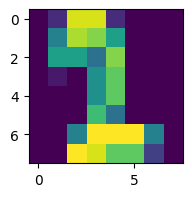

In [47]:
ind = np.random.randint(0, X_test.shape[0])
test_img = X_test[ind]
plt.figure(figsize=(2, 2))
plt.imshow(test_img.reshape([8,8]))

print("Предсказание нейронной сети: ")
print(np.argmax(run_nn(X_test[ind])))

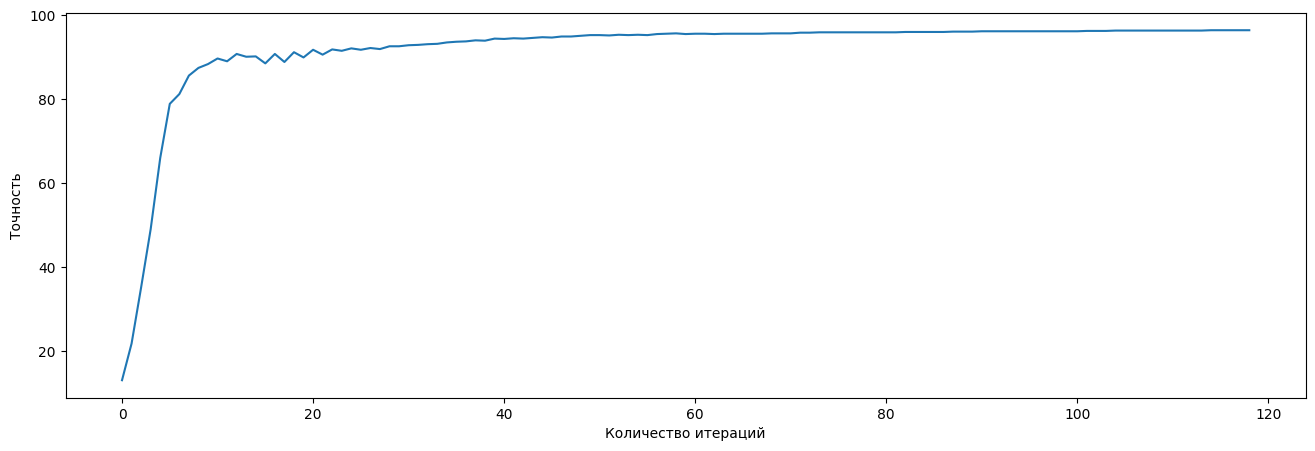

In [48]:
plt.figure(figsize=(16, 5))
plt.plot(metrics)
plt.xlabel('Количество итераций')
plt.ylabel('Точность')
plt.show()

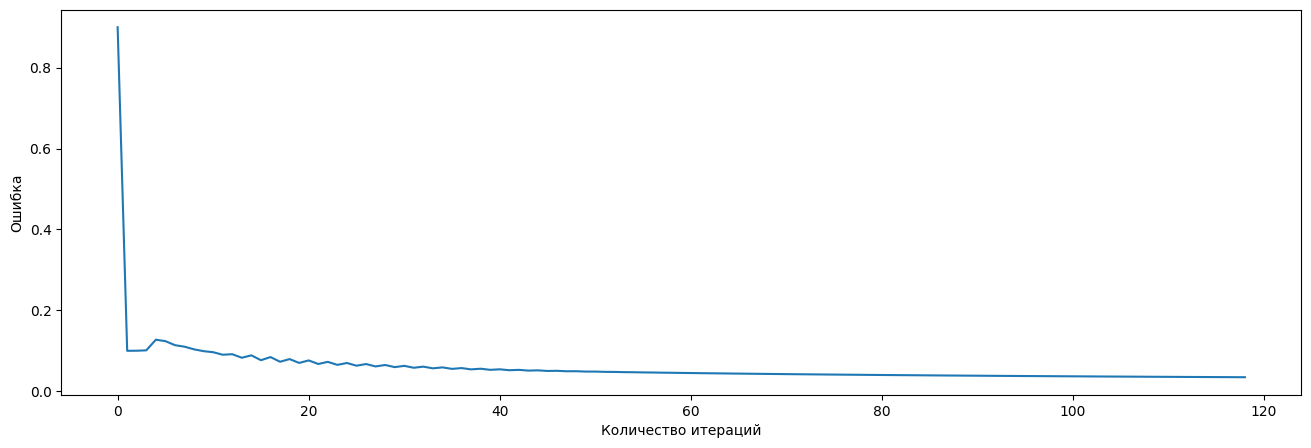

In [49]:
plt.figure(figsize=(16, 5))
plt.plot(errors)
plt.xlabel('Количество итераций')
plt.ylabel('Ошибка')
plt.show()

#### При увеличении кол-ва эпох ошибка уменьшается что видно из графика, причем что бы значительно она уменьшилась необходимо незначительное кол-во эпох. <b>Так же и с точностью, отличные показатели уже с малых количеств эпох.<b> Ну это опять же отлично работает при хорошей настройке и обучении нейронки. Тут она показывыает себя блестяще. На точность результатов влияет правильное обучение неросети, соответственно нужно верно подобрать веса, что бы она обучилась и работала корректно. 1 